In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import TargetEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

In [ ]:
Df = pd.read_csv('/content/hotel_bookings.csv')

In [ ]:
Df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
Df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
numerical_features = Df.select_dtypes(exclude=['object']).columns
categorical_features = Df.select_dtypes(include=['object']).columns

# Handling NULL values and EDA:

In [ ]:
Df.duplicated().sum()

np.int64(31994)

So, there are 31994 duplicate rows. Let's drop them.

In [ ]:
Df.drop_duplicates(keep='first',inplace=True)

In [ ]:
Df[numerical_features].isnull().sum()

,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,4
babies,0


In [ ]:
Df['children'] = Df['children'].fillna(Df['children'].mode().iloc[0])
#Mode and Median of children column is zero

In [ ]:
Df[numerical_features].isnull().sum()

,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
babies,0


Agent and company columns have NULL values but these values do not represent lack of any value rather they mean "Not Applicable" (described in dataset description). We should impute these null values with an appropriate value describing the same.

<Axes: ylabel='Frequency'>

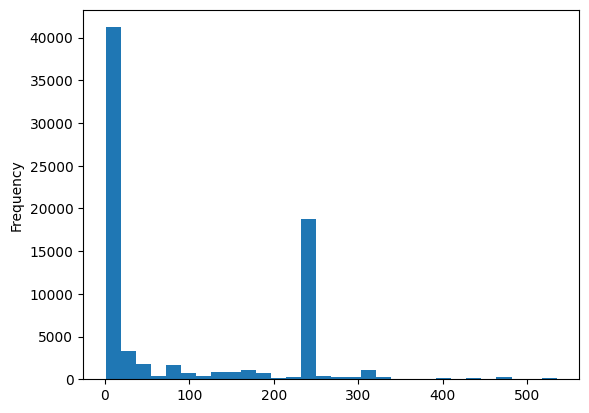

In [ ]:
Df['agent'].plot(kind='hist',bins=30)

In [ ]:
(Df['agent'] == -1).any()

np.False_

So, the agent colunmn does not have any code equal to -1 as all the codes are positive. We can impute the NULL values with -1 to indicate that no agent was present for the booking.

In [ ]:
Df['agent'] = Df['agent'].fillna(-1)

In [ ]:
Df[numerical_features].isnull().sum()

,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
babies,0


We follow the same imputation procedure for "company" column.

<Axes: ylabel='Frequency'>

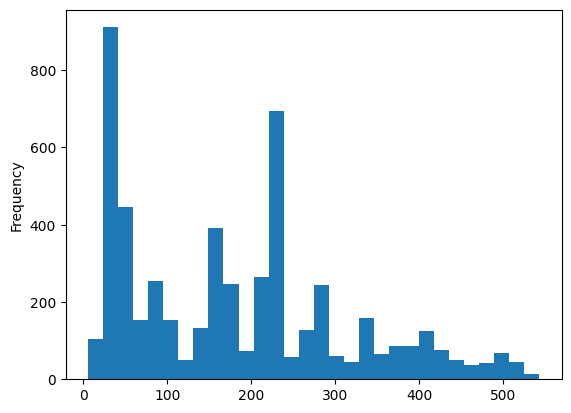

In [ ]:
Df['company'].plot(kind='hist',bins=30)

In [ ]:
(Df['company'] == -1).any()

np.False_

In [ ]:
Df['company'] = Df['company'].fillna(-1)

In [ ]:
Df[numerical_features].isnull().sum()

,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
babies,0


Now, that null values are handled in numerical features, let's check the same in Categorical features now.

In [ ]:
Df[categorical_features].isnull().sum()

,0
hotel,0
arrival_date_month,0
meal,0
country,452
market_segment,0
distribution_channel,0
reserved_room_type,0
assigned_room_type,0
deposit_type,0
customer_type,0


488 rows reflect approximately 0.4% of the data. We need to impute the null values with a reasonable imputation value. By common sense, let's take the mode of 'country'column and impute it.

In [ ]:
Df['country'] = Df['country'].fillna(Df['country'].mode().iloc[0])

In [ ]:
Df[categorical_features].isnull().sum()

,0
hotel,0
arrival_date_month,0
meal,0
country,0
market_segment,0
distribution_channel,0
reserved_room_type,0
assigned_room_type,0
deposit_type,0
customer_type,0


In [ ]:
Df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


# Steps to control leakage:


In [ ]:
Df.drop(['reservation_status'],axis=1,inplace=True)

In [ ]:
Df.drop(['reservation_status_date'],axis=1,inplace=True)

In [ ]:
Df.drop(['previous_cancellations'],axis=1,inplace=True)

In [ ]:
Df.drop(['previous_bookings_not_canceled'],axis=1,inplace=True)

In [ ]:
Df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [ ]:
#Removing the target variable before scaling
target_series = Df['is_canceled']
Df.drop(['is_canceled'],axis=1,inplace=True)

# Scaling numerical features:

In [ ]:
numerical_features = Df.select_dtypes(exclude=['object']).columns
categorical_features = Df.select_dtypes(include=['object']).columns

In [ ]:
numerical_features = numerical_features.drop(['is_repeated_guest'])

# is_repeated_guest is a boolean numerical feature, it will not require scaling.

In [ ]:
Df[numerical_features]

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,0,2,0.0,0,3,-1.0,-1.0,0,0.00,0,0
1,737,2015,27,1,0,0,2,0.0,0,4,-1.0,-1.0,0,0.00,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,-1.0,-1.0,0,75.00,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,304.0,-1.0,0,75.00,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,240.0,-1.0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,394.0,-1.0,0,96.14,0,0
119386,102,2017,35,31,2,5,3,0.0,0,0,9.0,-1.0,0,225.43,0,2
119387,34,2017,35,31,2,5,2,0.0,0,0,9.0,-1.0,0,157.71,0,4
119388,109,2017,35,31,2,5,2,0.0,0,0,89.0,-1.0,0,104.40,0,0


In [ ]:
Df[numerical_features].describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.271603,80.865143,10.076983,0.749565,106.337246,0.084226,0.698567
std,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.727245,110.048927,54.239239,10.015731,55.013953,0.281533,0.831946
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-6.380000,0.000000,0.000000
25%,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,72.000000,0.000000,0.000000
50%,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,98.100000,0.000000,0.000000
75%,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,234.000000,-1.000000,0.000000,134.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
Df[numerical_features] = scaler.fit_transform(Df[numerical_features])

NameError: name 'StandardScaler' is not defined

# Encoding categorical features

In [ ]:
Df[categorical_features]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient
...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient


None of the categorical features seem to have an ordinal relationship as far as predicting booking cancellations is concerned. Let's explore the cardinality of all features.

In [ ]:
#Determining the cardinality of all categorical features:

for i in categorical_features:
  print (f"{i} = {Df[i].nunique()}")

hotel = 2
arrival_date_month = 12
meal = 5
country = 177
market_segment = 8
distribution_channel = 5
reserved_room_type = 10
assigned_room_type = 12
deposit_type = 3
customer_type = 4


Since there are many features with high cardinality, we will employ Target encoding with Nested cross validation.

In [ ]:
encoder = TargetEncoder(cv=5,shuffle=True,random_state=1)

In [ ]:
Df[categorical_features] = encoder.fit_transform(Df[categorical_features],target_series)

In [ ]:
Df[categorical_features]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,0.233824,0.318851,0.265923,0.350667,0.146430,0.147651,0.329602,0.188487,0.266939,0.300693
1,0.235114,0.317104,0.265869,0.353777,0.148294,0.149618,0.334149,0.184970,0.266773,0.301088
2,0.236582,0.317149,0.264786,0.194059,0.148365,0.148341,0.260049,0.181065,0.266802,0.301097
3,0.234139,0.318896,0.265096,0.189646,0.116819,0.123492,0.260728,0.307291,0.266904,0.301158
4,0.235114,0.317104,0.265869,0.187982,0.352414,0.309301,0.259935,0.306303,0.266773,0.301088
...,...,...,...,...,...,...,...,...,...,...
119385,0.300896,0.320546,0.265744,0.193372,0.146439,0.309802,0.259855,0.305905,0.266827,0.301254
119386,0.300670,0.323657,0.265923,0.197915,0.353735,0.309536,0.276027,0.239106,0.266939,0.300693
119387,0.300670,0.323657,0.265923,0.195723,0.353735,0.309536,0.304694,0.244158,0.266939,0.300693
119388,0.300896,0.320546,0.265744,0.189890,0.354513,0.309802,0.259855,0.305905,0.266827,0.301254


# Splitting Training and testing data:

In [ ]:
#Converting all values to float32, as per assignment requirements
Df = Df.astype(np.float32)

In [ ]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        87396 non-null  float32
 1   lead_time                    87396 non-null  float32
 2   arrival_date_year            87396 non-null  float32
 3   arrival_date_month           87396 non-null  float32
 4   arrival_date_week_number     87396 non-null  float32
 5   arrival_date_day_of_month    87396 non-null  float32
 6   stays_in_weekend_nights      87396 non-null  float32
 7   stays_in_week_nights         87396 non-null  float32
 8   adults                       87396 non-null  float32
 9   children                     87396 non-null  float32
 10  babies                       87396 non-null  float32
 11  meal                         87396 non-null  float32
 12  country                      87396 non-null  float32
 13  market_segment      

In [ ]:
#Using x and y variable naming for training and test data for easier interpretation

x_train,x_test,y_train,y_test = train_test_split(Df,target_series,random_state=1,test_size=0.2)

In [ ]:
x_train

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
29714,0.236582,0.017639,0.5,0.210474,0.846154,0.066667,0.000000,0.02,0.036364,0.0,...,0.307104,0.095238,0.266802,0.688433,0.0,0.0,0.151537,0.008209,0.0,0.2
35717,0.234139,0.020353,1.0,0.305916,0.307692,0.933333,0.000000,0.02,0.036364,0.0,...,0.307291,0.095238,0.266904,0.468284,0.0,0.0,0.301158,0.018752,0.0,0.0
8853,0.234139,0.331072,0.5,0.239999,0.807692,0.500000,0.105263,0.10,0.036364,0.0,...,0.237218,0.000000,0.266904,0.449627,0.0,0.0,0.301158,0.023376,0.0,0.2
21727,0.234387,0.000000,0.5,0.249712,0.192308,0.266667,0.000000,0.02,0.036364,0.0,...,0.235148,0.000000,0.266827,0.000000,0.0,0.0,0.301254,0.011353,0.0,0.2
93447,0.300896,0.134328,0.5,0.317905,0.557692,0.566667,0.052632,0.06,0.036364,0.0,...,0.305905,0.000000,0.266827,0.018657,0.0,0.0,0.301254,0.027399,0.0,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26215,0.236582,0.141113,0.5,0.317149,0.557692,0.700000,0.052632,0.04,0.072727,0.0,...,0.308065,0.285714,0.266802,0.011194,0.0,0.0,0.151537,0.047903,0.0,0.0
102640,0.300896,0.424695,0.5,0.267341,0.923077,0.000000,0.000000,0.06,0.036364,0.0,...,0.242191,0.000000,0.266827,0.018657,0.0,0.0,0.301254,0.018160,0.0,0.2
69750,0.300184,0.134328,1.0,0.302554,0.423077,0.133333,0.052632,0.06,0.036364,0.2,...,0.246490,0.000000,0.266773,0.018657,0.0,0.0,0.301088,0.047422,0.0,0.0
6994,0.234139,0.187246,0.5,0.318896,0.538462,0.500000,0.052632,0.02,0.036364,0.0,...,0.237218,0.000000,0.266904,0.449627,0.0,0.0,0.301158,0.035769,0.0,0.2


In [ ]:
y_train

,is_canceled
29714,0
35717,0
8853,1
21727,0
93447,0
...,...
26215,0
102640,0
69750,1
6994,1


In [ ]:
x_test

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
97875,0.300670,0.077341,0.5,0.241102,0.730769,0.666667,0.000000,0.02,0.036364,0.0,...,0.244158,0.000000,0.266939,0.014925,0.000000,0.0,0.300693,0.022459,0.0,0.4
44606,0.300184,0.284939,0.0,0.230289,0.769231,0.233333,0.052632,0.06,0.036364,0.0,...,0.242573,0.000000,0.266773,0.024254,0.000000,0.0,0.152841,0.014636,0.0,0.0
50472,0.300880,0.126187,0.5,0.292405,0.346154,0.033333,0.052632,0.00,0.036364,0.0,...,0.307291,0.000000,0.266904,0.018657,0.000000,0.0,0.301158,0.022655,0.0,0.0
27024,0.233824,0.351425,0.5,0.323657,0.615385,0.333333,0.105263,0.10,0.036364,0.0,...,0.304498,0.095238,0.266939,0.268657,0.000000,0.0,0.300693,0.021933,0.0,0.2
26883,0.235114,0.061058,0.5,0.323925,0.615385,0.333333,0.000000,0.06,0.036364,0.0,...,0.306303,0.000000,0.266773,0.449627,0.000000,0.0,0.301088,0.040578,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106905,0.300896,0.001357,1.0,0.249712,0.153846,0.100000,0.000000,0.02,0.036364,0.0,...,0.305905,0.000000,0.266827,0.018657,0.000000,0.0,0.301254,0.022821,0.0,0.0
55187,0.300880,0.215739,0.5,0.321689,0.615385,0.200000,0.105263,0.02,0.036364,0.1,...,0.307291,0.000000,0.266904,0.018657,0.000000,0.0,0.301158,0.025318,0.0,0.2
23439,0.234139,0.132972,0.5,0.305916,0.307692,0.633333,0.105263,0.08,0.036364,0.0,...,0.244554,0.000000,0.266904,0.453358,0.000000,0.0,0.301158,0.016384,0.0,0.2
79053,0.300670,0.000000,0.0,0.239934,0.807692,0.633333,0.000000,0.02,0.018182,0.0,...,0.220985,0.000000,0.266939,0.000000,0.150735,0.0,0.300693,0.023931,0.0,0.0


In [ ]:
y_test

,is_canceled
97875,0
44606,1
50472,1
27024,0
26883,0
...,...
106905,0
55187,1
23439,0
79053,0


# Decision Tree algorithm:

In [ ]:
dtc = DecisionTreeClassifier(random_state=1)
clock_time_dtc = [] #to report fit and predict times for Decision Tree classifier

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
#Plotting Validation curve/Model complexity curve w.r.t. max_depth:

max_depth_range = [4,5,6,7,8,9,10,11,12,13,14,15]

train_scores_vc, test_scores_vc = validation_curve(
    estimator=dtc,
    X=x_train,
    y=y_train,
    param_name="max_depth",
    param_range=max_depth_range,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
    )


train_vc_mean = train_scores_vc.mean(axis=1)
test_vc_mean = test_scores_vc.mean(axis=1)

#Plotting Validation curve/Model complexity curve for max_depth:
plt.figure(figsize=(10,5))
plt.plot(max_depth_range, train_vc_mean, color="blue",label="Training error")
plt.plot(max_depth_range, test_vc_mean, color="red",label="Validation error")
plt.xlabel("max_depth size")
plt.xticks(max_depth_range)
plt.ylabel("Error")
plt.title("Validation curve")
plt.legend()
plt.show()


In [ ]:
#Plotting Validation curve/Model complexity curve w.r.t. ccp_alpha:

ccp_alpha_range = [0,0.001,0.01]

train_scores_vc, test_scores_vc = validation_curve(
    estimator=dtc,
    X=x_train,
    y=y_train,
    param_name="ccp_alpha",
    param_range=ccp_alpha_range,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
    )


train_vc_mean = train_scores_vc.mean(axis=1)
test_vc_mean = test_scores_vc.mean(axis=1)

#Plotting Validation curve/Model complexity curve for max_depth:
plt.figure(figsize=(10,7))
plt.plot(ccp_alpha_range, train_vc_mean, color="blue",label="Training error")
plt.plot(ccp_alpha_range, test_vc_mean, color="red",label="Validation error")
plt.xlabel("ccp_alpha")
plt.xticks([0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01])
plt.ylabel("Error")
plt.title("Validation curve")
plt.legend()
plt.show()


NameError: name 'validation_curve' is not defined

In [ ]:
# Using GridsearchCV to do hyperparameter tuning with nested cross validation

parameter_grid = {
    'criterion':['gini','entropy'],
    'ccp_alpha':[0,0.001,0.005],
    'max_depth':[4,7,10,15],
    'random_state':[1]
}


final_model = GridSearchCV(
    estimator=dtc,
    param_grid=parameter_grid,
    cv=3,
    scoring='accuracy'
)

In [ ]:
start_time = time.time()
final_model.fit(x_train,y_train)
fit_time = time.time() - start_time   #in seconds


In [ ]:
final_model.best_params_

In [ ]:
dtc.get_params().keys()

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=final_model,
    X=x_train,
    y=y_train,
    cv=3,
    scoring='accuracy',
    train_sizes=([0.05,0.33,0.68,1.]),
    shuffle=True,
    n_jobs=-1,
    random_state=1
)

In [ ]:
#calculating the mean training and test score for each training size
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)


In [ ]:
#Plot Learning curve
plt.figure(figsize=(5,5))
plt.plot(train_sizes, train_mean, color="blue",label="Training error")
plt.plot(train_sizes, test_mean, color="red",label="Validation error")
plt.xlabel("Training size")
plt.ylabel("Error")
plt.title("Learning curve")
plt.legend()
plt.show()

In [ ]:
start_time = time.time()
y_predict = final_model.predict(x_test)
predict_time = time.time() - start_time  #in seconds

clock_time_dtc.append ((fit_time, predict_time))

In [ ]:
y_predict

In [ ]:
#Wall-clock fit and predict times
print (f"Fit time for Decision Tree classifier: {clock_time_dtc[0][0]} seconds")
print (f"Predict time for Decision Tree classifier: {clock_time_dtc[0][1]} seconds")

In [ ]:
metrics.confusion_matrix(y_test,y_predict)

NameError: name 'metrics' is not defined

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [ ]:
#Accuracy, Precision, Recall and F1 scores:

print (f"Accuracy = {metrics.accuracy_score(y_test,y_predict)}")
print (f"Precision = {metrics.precision_score(y_test,y_predict)}")
print (f"Recall = {metrics.recall_score(y_test,y_predict)}")
print (f"F1 score = {metrics.f1_score(y_test,y_predict)}")

In [ ]:
#Predicting Probabilities of each row in test data to plot ROC curve
y_predict_proba = final_model.predict_proba(x_test)[:,1]

In [ ]:
precision,recall,thresholds = metrics.precision_recall_curve(y_test,y_predict_proba)

In [ ]:
#Plot Precision Recall curve
plt.figure(figsize=(5,5))
plt.plot(precision, recall, color="blue")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve")
plt.show()

NameError: name 'plt' is not defined

In [ ]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_predict_proba)

In [ ]:
auc = metrics.roc_auc_score(y_test,y_predict_proba)

In [ ]:
#plot ROC curve
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color="blue")
plt.plot([0, 1], [0, 1], color="green", linestyle="--", label="Reference")
plt.plot(1,1,"ro")
plt.plot(0,0,"ro")
plt.text(0.45,0.85,f"Area under \nROC curve: {auc:0.2}",color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Neural Networks algorithm:

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(random_state=1,max_iter=6,batch_size=512,early_stopping=True,shuffle=True,n_iter_no_change=2)
clock_time_mlp = [] #to report fit and predict times for Multilayer Perceptron classifier

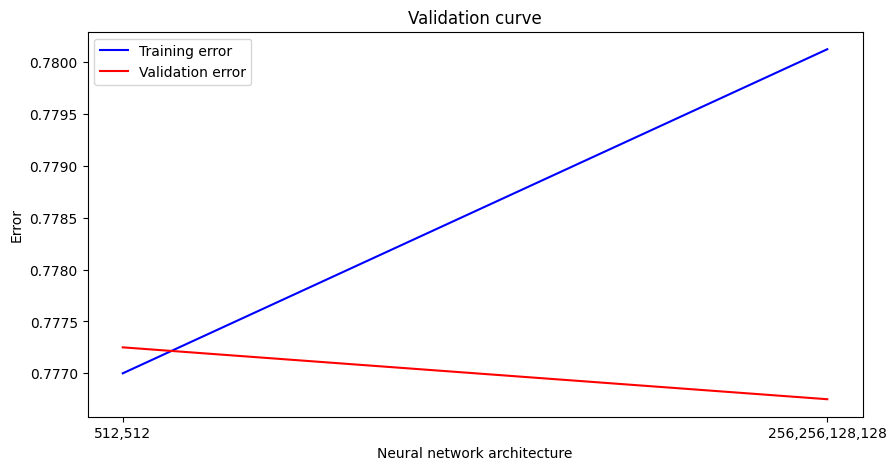

In [ ]:
#Plotting Validation curve/Model complexity curve w.r.t. varying width of the network:

hidden_layer_sizes_range = [(512,512),(256,256,128,128)]

train_scores_vc, test_scores_vc = validation_curve(
    estimator=mlp,
    X=x_train[:8000],
    y=y_train[:8000],
    param_name="hidden_layer_sizes",
    param_range=hidden_layer_sizes_range,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
    )

train_vc_mean = train_scores_vc.mean(axis=1)
test_vc_mean = test_scores_vc.mean(axis=1)

#Plotting Validation curve/Model complexity curve for max_depth:
plt.figure(figsize=(10,5))
plt.plot(["512,512","256,256,128,128"], train_vc_mean, color="blue",label="Training error")
plt.plot(["512,512","256,256,128,128"], test_vc_mean, color="red",label="Validation error")
plt.xlabel("Neural network architecture")
#plt.xticks(hidden_layer_sizes_range)
plt.ylabel("Error")
plt.title("Validation curve")
plt.legend()
plt.show()

In [ ]:
# Using GridsearchCV to do hyperparameter tuning with nested cross validation

parameter_grid = {
    'hidden_layer_sizes':[(512,512),(256,256,128,128)],
    'activation':["relu","identity","logistic","tanh"],
    'learning_rate':["constant", "invscaling", "adaptive"],
    'random_state':[1]
}

final_model = GridSearchCV(
    estimator=mlp,
    param_grid=parameter_grid,
    cv=3,
    scoring='accuracy'
)

In [ ]:
start_time = time.time()
final_model.fit(x_train[:2000],y_train[:2000])
fit_time = time.time() - start_time   #in seconds

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
final_model.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (512, 512),
 'learning_rate': 'constant',
 'random_state': 1}

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=final_model,
    X=x_train[:1000],
    y=y_train[:1000],
    cv=3,
    scoring='accuracy',
    train_sizes=([0.05,0.6,1.]),
    shuffle=True,
    n_jobs=-1,
    random_state=1
)

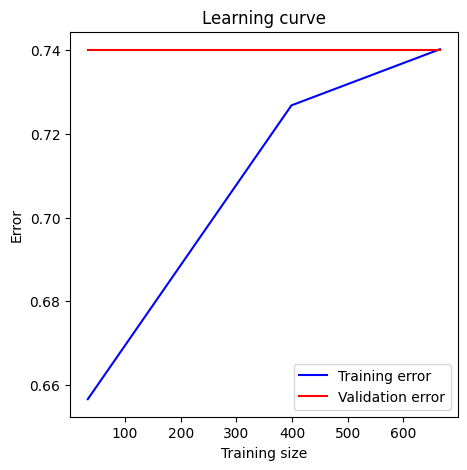

In [ ]:
#calculating the mean training and test score for each training size
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)


#Plot Learning curve
plt.figure(figsize=(5,5))
plt.plot(train_sizes, train_mean, color="blue",label="Training error")
plt.plot(train_sizes, test_mean, color="red",label="Validation error")
plt.xlabel("Training size")
plt.ylabel("Error")
plt.title("Learning curve")
plt.legend()
plt.show()

In [ ]:
start_time = time.time()
y_predict = final_model.predict(x_test)
predict_time = time.time() - start_time  #in seconds

In [ ]:
clock_time_mlp.append ((fit_time, predict_time))

In [ ]:
#Wall-clock fit and predict times
print (f"Fit time for MLP: {clock_time_mlp[0][0]} seconds")
print (f"Predict time for MLP: {clock_time_mlp[0][1]} seconds")

Fit time for MLP: 48.5299174785614 seconds
Predict time for MLP: 1.5133907794952393 seconds


In [ ]:
metrics.confusion_matrix(y_test,y_predict)

array([[12393,   395],
       [ 3705,   987]])

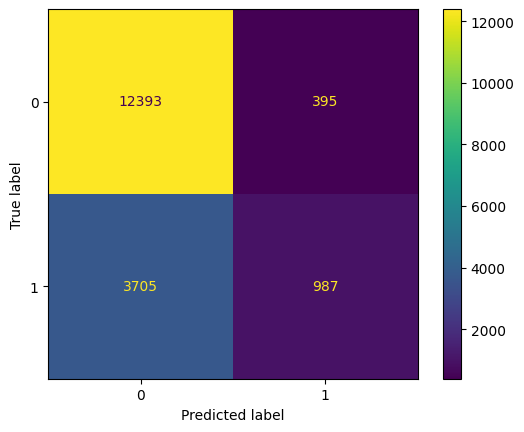

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [ ]:
#Accuracy, Precision, Recall and F1 scores:

print (f"Accuracy = {metrics.accuracy_score(y_test,y_predict)}")
print (f"Precision = {metrics.precision_score(y_test,y_predict)}")
print (f"Recall = {metrics.recall_score(y_test,y_predict)}")
print (f"F1 score = {metrics.f1_score(y_test,y_predict)}")

Accuracy = 0.7654462242562929
Precision = 0.7141823444283647
Recall = 0.21035805626598467
F1 score = 0.324991768192295


In [ ]:
#Predicting Probabilities of each row in test data to plot ROC curve
y_predict_proba = final_model.predict_proba(x_test)[:,1]

In [ ]:
precision,recall,thresholds = metrics.precision_recall_curve(y_test,y_predict_proba)

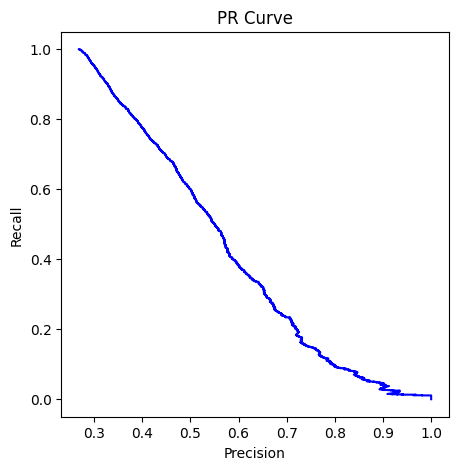

In [ ]:
#Plot Precision Recall curve
plt.figure(figsize=(5,5))
plt.plot(precision, recall, color="blue")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve")
plt.show()


In [ ]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_predict_proba)

In [ ]:
auc = metrics.roc_auc_score(y_test,y_predict_proba)

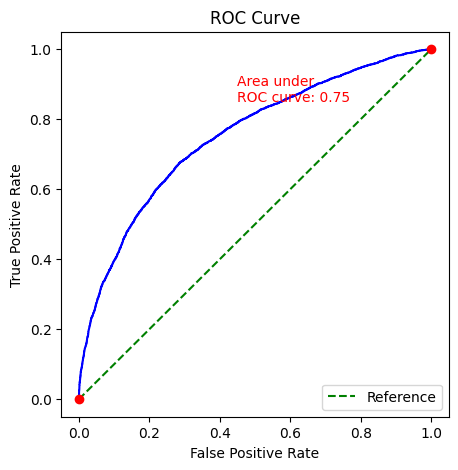

In [ ]:
#plot ROC curve
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color="blue")
plt.plot([0, 1], [0, 1], color="green", linestyle="--", label="Reference")
plt.plot(1,1,"ro")
plt.plot(0,0,"ro")
plt.text(0.45,0.85,f"Area under \nROC curve: {auc:0.2}",color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# K-NN algorithm:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc = KNeighborsClassifier(algorithm='brute',metric='euclidean',n_jobs=-1)
clock_time_knc = [] #to report fit and predict times for K Neighbors classifier

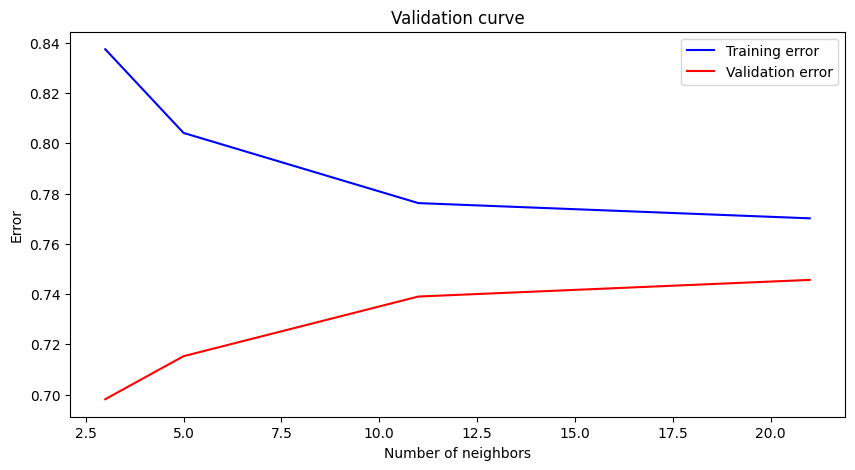

In [ ]:
#Plotting Validation curve/Model complexity curve w.r.t. number of neighbors:

n_neighbors_range = [3,5,11,21]

train_scores_vc, test_scores_vc = validation_curve(
    estimator=knc,
    X=x_train[:8000],
    y=y_train[:8000],
    param_name="n_neighbors",
    param_range=n_neighbors_range,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
    )

train_vc_mean = train_scores_vc.mean(axis=1)
test_vc_mean = test_scores_vc.mean(axis=1)

#Plotting Validation curve/Model complexity curve for max_depth:
plt.figure(figsize=(10,5))
plt.plot([3,5,11,21], train_vc_mean, color="blue",label="Training error")
plt.plot([3,5,11,21], test_vc_mean, color="red",label="Validation error")
plt.xlabel("Number of neighbors")
#plt.xticks(hidden_layer_sizes_range)
plt.ylabel("Error")
plt.title("Validation curve")
plt.legend()
plt.show()

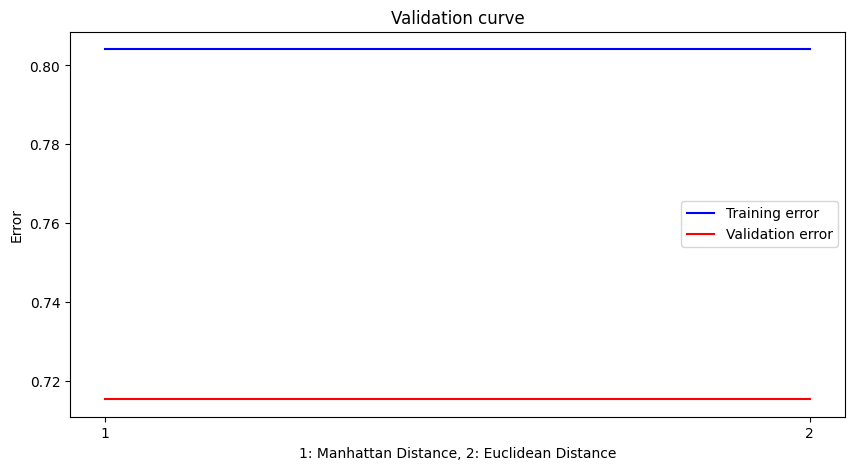

In [ ]:
#Plotting Validation curve/Model complexity curve w.r.t. metric:

p_range = [1,2] #1 = Manhattan, 2 = Euclidean

train_scores_vc, test_scores_vc = validation_curve(
    estimator=knc,
    X=x_train[:8000],
    y=y_train[:8000],
    param_name="p",
    param_range=p_range,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
    )

train_vc_mean = train_scores_vc.mean(axis=1)
test_vc_mean = test_scores_vc.mean(axis=1)

#Plotting Validation curve/Model complexity curve for max_depth:
plt.figure(figsize=(10,5))
plt.plot(p_range, train_vc_mean, color="blue",label="Training error")
plt.plot(p_range, test_vc_mean, color="red",label="Validation error")
plt.xlabel("1: Manhattan Distance, 2: Euclidean Distance")
plt.xticks(p_range)
plt.ylabel("Error")
plt.title("Validation curve")
plt.legend()
plt.show()

In [ ]:
final_model = KNeighborsClassifier(n_neighbors=21,algorithm='brute',metric='euclidean',n_jobs=-1)

In [ ]:
start_time = time.time()
final_model.fit(x_train,y_train)
fit_time = time.time() - start_time   #in seconds

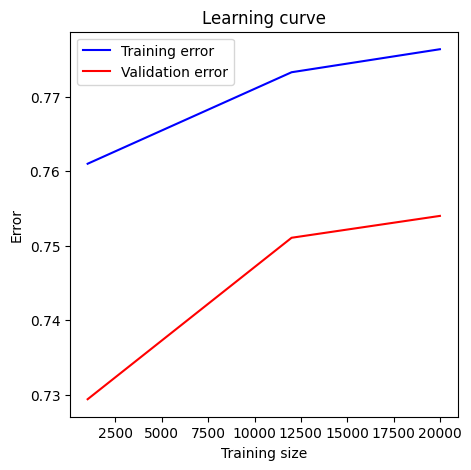

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=final_model,
    X=x_train[:30000],
    y=y_train[:30000],
    cv=3,
    scoring='accuracy',
    train_sizes=([0.05,0.6,1.]),
    shuffle=True,
    n_jobs=-1,
    random_state=1
)


#calculating the mean training and test score for each training size
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)


#Plot Learning curve
plt.figure(figsize=(5,5))
plt.plot(train_sizes, train_mean, color="blue",label="Training error")
plt.plot(train_sizes, test_mean, color="red",label="Validation error")
plt.xlabel("Training size")
plt.ylabel("Error")
plt.title("Learning curve")
plt.legend()
plt.show()

In [ ]:
start_time = time.time()
y_predict = final_model.predict(x_test)
predict_time = time.time() - start_time  #in seconds


clock_time_knc.append ((fit_time, predict_time))


#Wall-clock fit and predict times
print (f"Fit time for MLP: {clock_time_knc[0][0]} seconds")
print (f"Predict time for MLP: {clock_time_knc[0][1]} seconds")

Fit time for MLP: 0.03568291664123535 seconds
Predict time for MLP: 9.384474039077759 seconds


In [ ]:
metrics.confusion_matrix(y_test,y_predict)

array([[11739,  1049],
       [ 2979,  1713]])

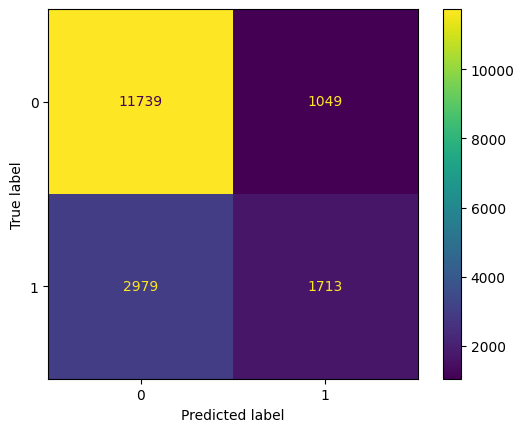

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [ ]:
#Accuracy, Precision, Recall and F1 scores:

print (f"Accuracy = {metrics.accuracy_score(y_test,y_predict)}")
print (f"Precision = {metrics.precision_score(y_test,y_predict)}")
print (f"Recall = {metrics.recall_score(y_test,y_predict)}")
print (f"F1 score = {metrics.f1_score(y_test,y_predict)}")

Accuracy = 0.7695652173913043
Precision = 0.6202027516292542
Recall = 0.36508951406649615
F1 score = 0.4596189965119399


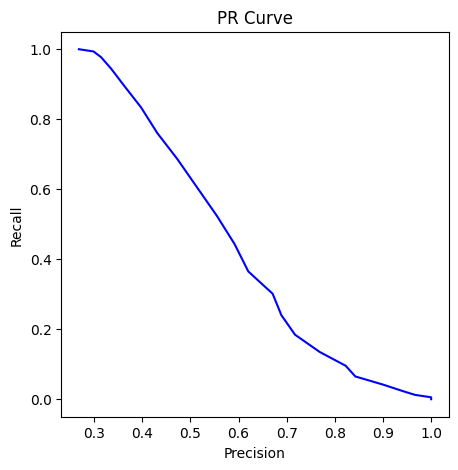

In [ ]:
#Predicting Probabilities of each row in test data to plot ROC curve
y_predict_proba = final_model.predict_proba(x_test)[:,1]


precision,recall,thresholds = metrics.precision_recall_curve(y_test,y_predict_proba)


#Plot Precision Recall curve
plt.figure(figsize=(5,5))
plt.plot(precision, recall, color="blue")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve")
plt.show()

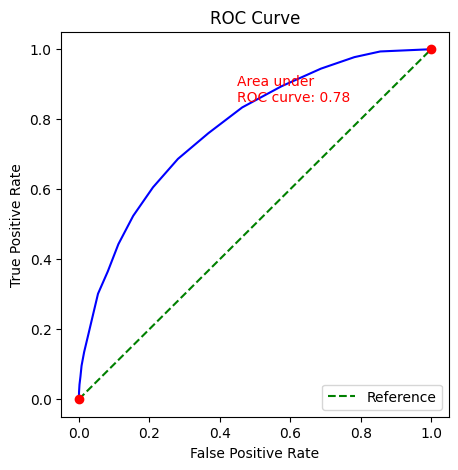

In [ ]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_predict_proba)


auc = metrics.roc_auc_score(y_test,y_predict_proba)


#plot ROC curve
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color="blue")
plt.plot([0, 1], [0, 1], color="green", linestyle="--", label="Reference")
plt.plot(1,1,"ro")
plt.plot(0,0,"ro")
plt.text(0.45,0.85,f"Area under \nROC curve: {auc:0.2}",color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine algorithm:

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [ ]:
lsvc = LinearSVC(random_state=1,class_weight='balanced',max_iter=10000)
clock_time_lsvc = [] #to report fit and predict times for Linear Support vector classification

svc = SVC(kernel='RBF',random_state=1)
clock_time_svc = [] #to report fit and predict times for Support vector classification

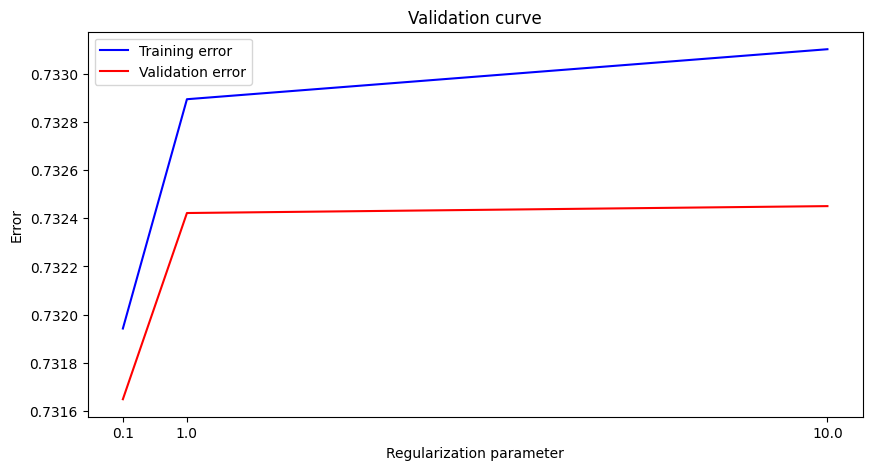

In [ ]:
#Tuning Linear Support vector classification model Regularization paramter:

c_range = [0.1,1,10]

train_scores_vc, test_scores_vc = validation_curve(
    estimator=lsvc,
    X=x_train,
    y=y_train,
    param_name="C",
    param_range=c_range,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
    )

train_vc_mean = train_scores_vc.mean(axis=1)
test_vc_mean = test_scores_vc.mean(axis=1)

#Plotting Validation curve/Model complexity curve for Regularization parameter:
plt.figure(figsize=(10,5))
plt.plot(c_range, train_vc_mean, color="blue",label="Training error")
plt.plot(c_range, test_vc_mean, color="red",label="Validation error")
plt.xlabel("Regularization parameter")
plt.xticks(c_range)
plt.ylabel("Error")
plt.title("Validation curve")
plt.legend()
plt.show()

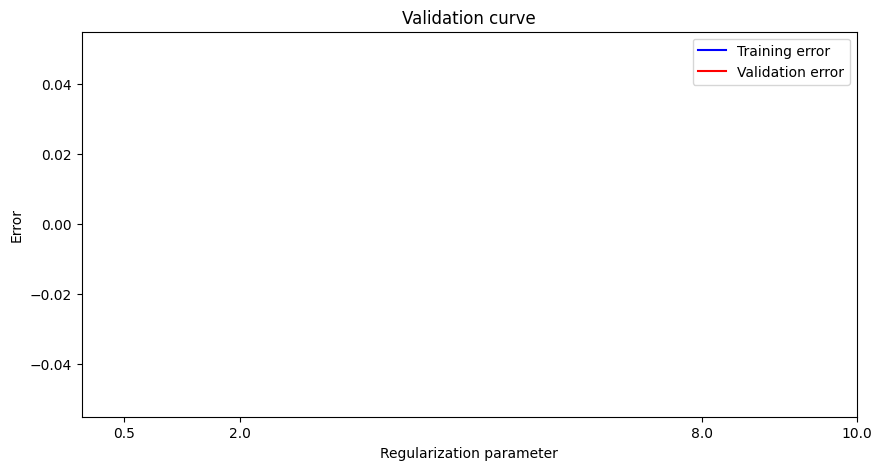

Training scores: [[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]
Testing scores: [[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]


In [ ]:
#Tuning Support vector classification model Regularization parameter (C):

c_range = [0.5,2,8,10]

train_scores_vc, test_scores_vc = validation_curve(
    estimator=svc,
    X=x_train,
    y=y_train,
    param_name="C",
    param_range=c_range,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
    )

train_vc_mean = train_scores_vc.mean(axis=1)
test_vc_mean = test_scores_vc.mean(axis=1)

#Plotting Validation curve/Model complexity curve for Regularization parameter:
plt.figure(figsize=(10,5))
plt.plot(c_range, train_vc_mean, color="blue",label="Training error")
plt.plot(c_range, test_vc_mean, color="red",label="Validation error")
plt.xlabel("Regularization parameter")
plt.xticks(c_range)
plt.ylabel("Error")
plt.title("Validation curve")
plt.legend()
plt.show()

print (f"Training scores: {train_scores_vc}")
print (f"Testing scores: {test_scores_vc}")

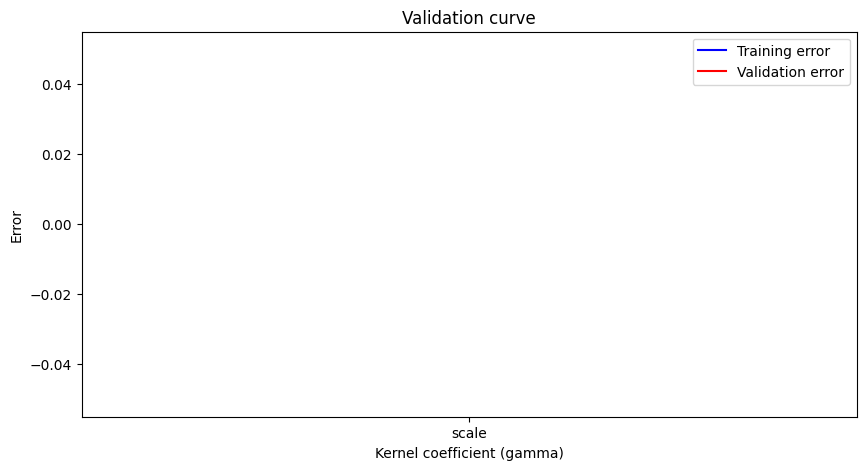

Training scores: [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
Testing scores: [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]


In [ ]:
#Tuning Support vector classification model Kernel Coefficient (gamma):

gamma_range = ["scale",1/4000,2/4000]

train_scores_vc, test_scores_vc = validation_curve(
    estimator=svc,
    X=x_train[:4000],
    y=y_train[:4000],
    param_name="gamma",
    param_range=gamma_range,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
    )

train_vc_mean = train_scores_vc.mean(axis=1)
test_vc_mean = test_scores_vc.mean(axis=1)

#Plotting Validation curve/Model complexity curve for Regularization parameter:
plt.figure(figsize=(10,5))
plt.plot(gamma_range, train_vc_mean, color="blue",label="Training error")
plt.plot(gamma_range, test_vc_mean, color="red",label="Validation error")
plt.xlabel("Kernel coefficient (gamma)")
#plt.xticks(gamma_range)
plt.ylabel("Error")
plt.title("Validation curve")
plt.legend()
plt.show()

print (f"Training scores: {train_scores_vc}")
print (f"Testing scores: {test_scores_vc}")

In [ ]:
final_model = lsvc = LinearSVC(C=0.1,random_state=1,class_weight='balanced',max_iter=10000)

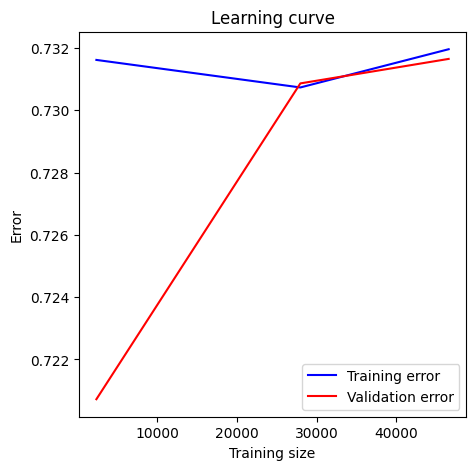

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=final_model,
    X=x_train,
    y=y_train,
    cv=3,
    scoring='accuracy',
    train_sizes=([0.05,0.6,1.]),
    shuffle=True,
    n_jobs=-1,
    random_state=1
)


#calculating the mean training and test score for each training size
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)


#Plot Learning curve
plt.figure(figsize=(5,5))
plt.plot(train_sizes, train_mean, color="blue",label="Training error")
plt.plot(train_sizes, test_mean, color="red",label="Validation error")
plt.xlabel("Training size")
plt.ylabel("Error")
plt.title("Learning curve")
plt.legend()
plt.show()

In [ ]:
start_time = time.time()
final_model.fit(x_train,y_train)
fit_time = time.time() - start_time   #in seconds

In [ ]:
start_time = time.time()
y_predict = final_model.predict(x_test)
predict_time = time.time() - start_time  #in seconds


In [ ]:
clock_time_lsvc.append ((fit_time, predict_time))

In [ ]:
#Wall-clock fit and predict times
print (f"Fit time for LSVC: {clock_time_lsvc[0][0]} seconds")
print (f"Predict time for LSVC: {clock_time_lsvc[0][1]} seconds")

Fit time for LSVC: 2.100905418395996 seconds
Predict time for LSVC: 0.005590915679931641 seconds


In [ ]:
metrics.confusion_matrix(y_test,y_predict)

array([[9270, 3518],
       [1121, 3571]])

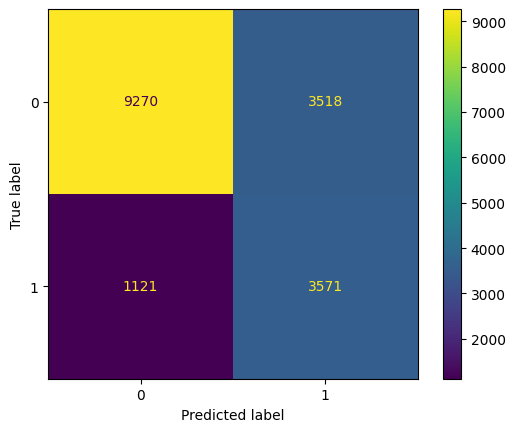

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [ ]:
#Accuracy, Precision, Recall and F1 scores:

print (f"Accuracy = {metrics.accuracy_score(y_test,y_predict)}")
print (f"Precision = {metrics.precision_score(y_test,y_predict)}")
print (f"Recall = {metrics.recall_score(y_test,y_predict)}")
print (f"F1 score = {metrics.f1_score(y_test,y_predict)}")

Accuracy = 0.7346109839816933
Precision = 0.5037381859218507
Recall = 0.7610826939471441
F1 score = 0.6062303709362533


In [ ]:
precision,recall,thresholds = metrics.precision_recall_curve(y_test,y_predict)

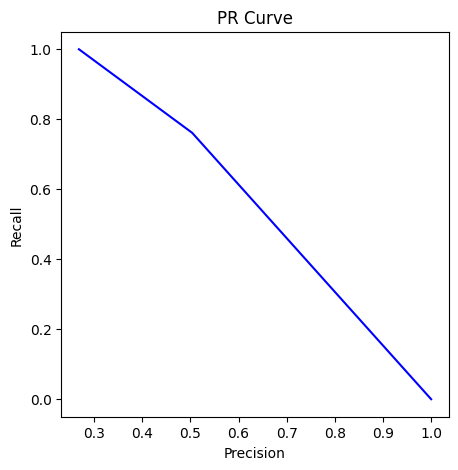

In [ ]:
#Plot Precision Recall curve
plt.figure(figsize=(5,5))
plt.plot(precision, recall, color="blue")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve")
plt.show()

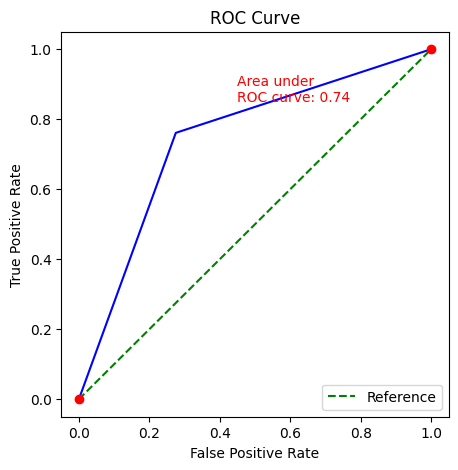

In [ ]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_predict)


auc = metrics.roc_auc_score(y_test,y_predict)


#plot ROC curve
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color="blue")
plt.plot([0, 1], [0, 1], color="green", linestyle="--", label="Reference")
plt.plot(1,1,"ro")
plt.plot(0,0,"ro")
plt.text(0.45,0.85,f"Area under \nROC curve: {auc:0.2}",color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()